# 7.7.3 Coeficiente de la silueta

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

Este es un coeficiente que mide la calidad del agrupamiento, en el que valores más altos indican clusters mejor definidos. Su cálculo se realiza usando dos métricas:

- **a**: El promedio de la distancia entre una muestra y todos los demás puntos que pertenecen a la misma clase.
- **b**: La distancia entre la muestra y todos los puntos del siguiente cluster más cercano.

La métrica se calcula como:

$$ s = \frac{b−a}{max(a,b)} $$

y toma valores entre -1 y +1.

La interpretación es la siguiente:

- Valores cercanos a -1 indican un agrupamiento incorrecto.
- Valores cercanos a cero indican clusters traslapados
- Valores cercanos a +1 indican clusters altamente densos.

De esta forma, los valores del coeficiente son más altos cuando los clusters son densos y bien separados.

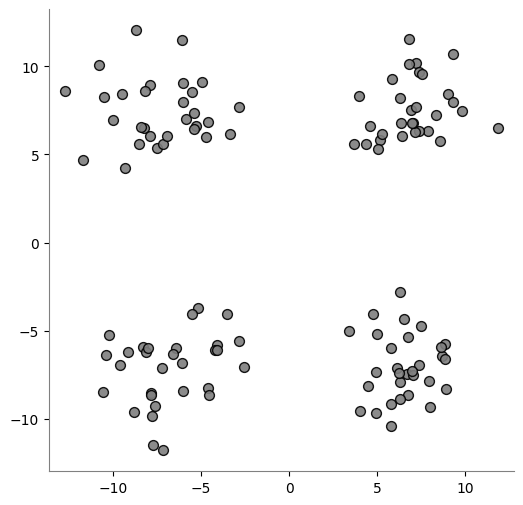

In [7]:
X, y = make_blobs(
    n_samples=120,
    n_features=2,
    centers=[
        [7, 7],
        [-7, 7],
        [-7, -7],
        [7, -7],
    ],
    cluster_std=2.0,
    shuffle=False,
    random_state=5,
)

plt.figure(figsize=(6, 6))

plt.scatter(
    X[:, 0],
    X[:, 1],
    color="tab:gray",
    edgecolors="k",
    s=50,
    alpha=0.9,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

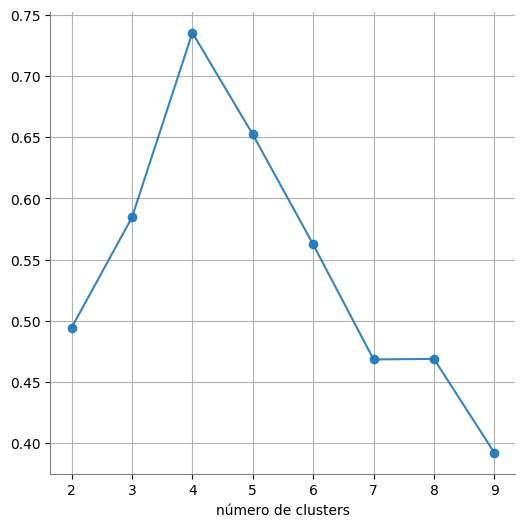

In [8]:
n_clusters = 10
scores = []

for n in range(2, n_clusters):

    kmeans = KMeans( n_clusters=n)
    kmeans.fit(X)
    labels = kmeans.labels_
    scores.append(silhouette_score(X, labels, metric="euclidean"))


plt.figure(figsize=(6,6))
plt.plot(range(2, n_clusters), scores, marker='o', color='tab:blue', alpha=0.9)
plt.xlabel('número de clusters')
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()

In [10]:
scores

[0.49426439839274006,
 0.5845155570289335,
 0.735348568190471,
 0.652187884066843,
 0.562342888093384,
 0.4683736446674666,
 0.46882097009302387,
 0.39213478604955954]

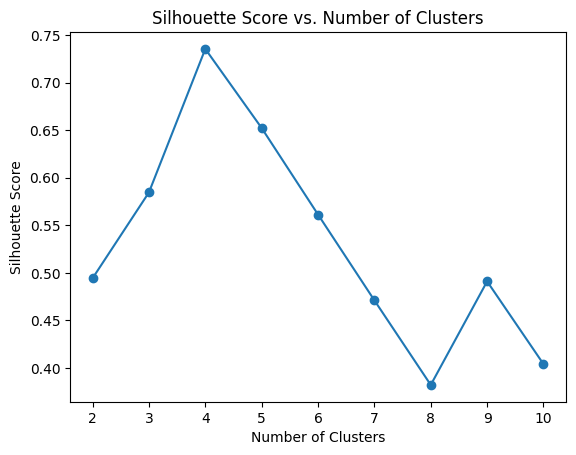

El número óptimo de grupos es: 4


In [13]:
# Rango de números de grupos que quieres probar
num_clusters_range = range(2, 11)

# Lista para almacenar las puntuaciones de la silueta
silhouette_scores = []

for num_clusters in num_clusters_range:
    # Aplicar el algoritmo de clustering (en este caso, KMeans)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calcular la puntuación de la silueta
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Encontrar el número de grupos con la puntuación de silueta más alta
optimal_num_clusters = num_clusters_range[np.argmax(silhouette_scores)]

# Graficar la puntuación de la silueta en función del número de grupos
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

print(f"El número óptimo de grupos es: {optimal_num_clusters}")

For n_clusters = 2 The average silhouette_score is : 0.49426439839274006
For n_clusters = 3 The average silhouette_score is : 0.5845155570289335
For n_clusters = 4 The average silhouette_score is : 0.735348568190471
For n_clusters = 5 The average silhouette_score is : 0.6265754011167052
For n_clusters = 6 The average silhouette_score is : 0.5372882584773916
For n_clusters = 7 The average silhouette_score is : 0.524216918214666
For n_clusters = 8 The average silhouette_score is : 0.5721108043462249
For n_clusters = 9 The average silhouette_score is : 0.5681672537395551
For n_clusters = 10 The average silhouette_score is : 0.4806702704623161


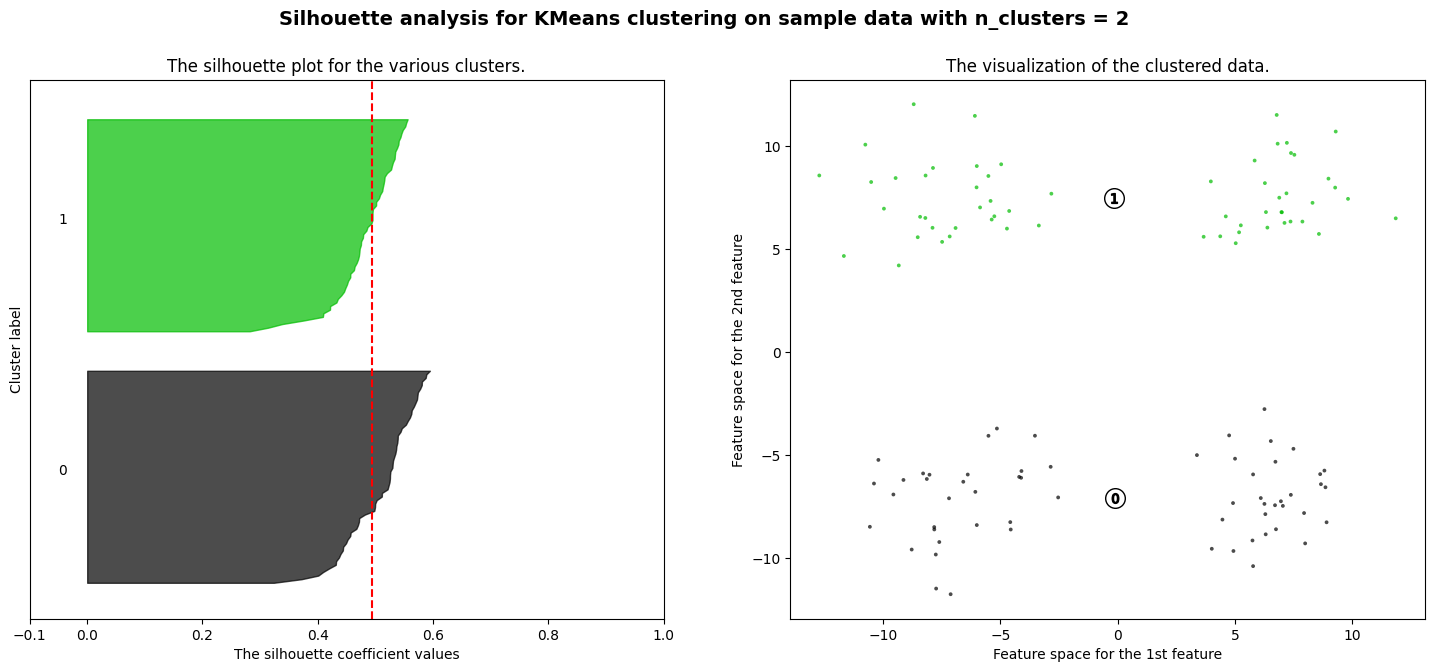

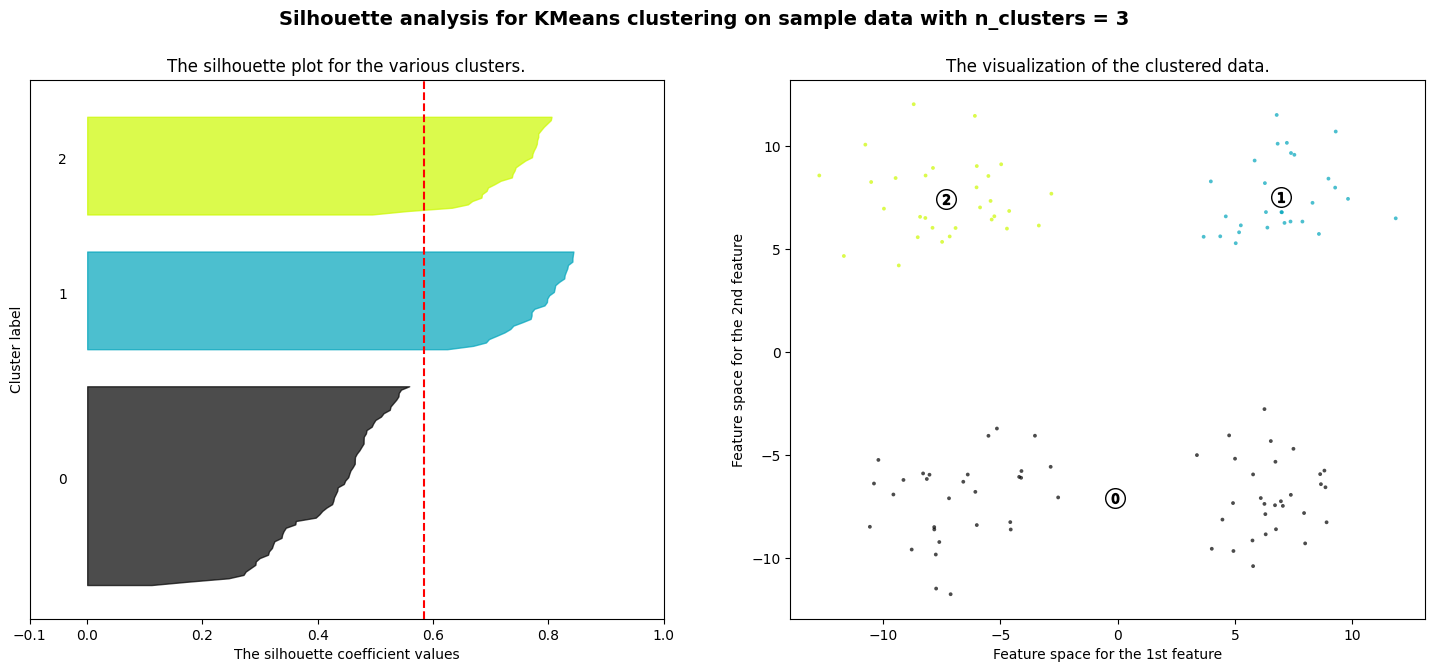

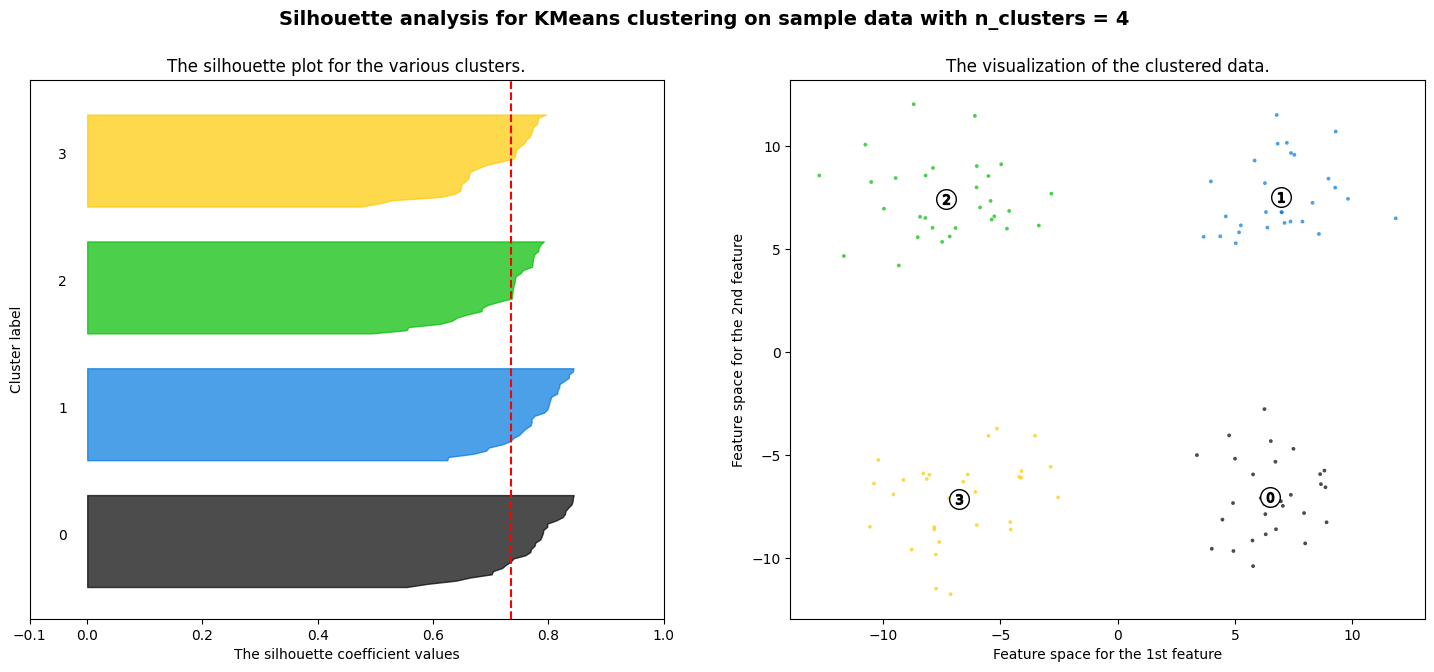

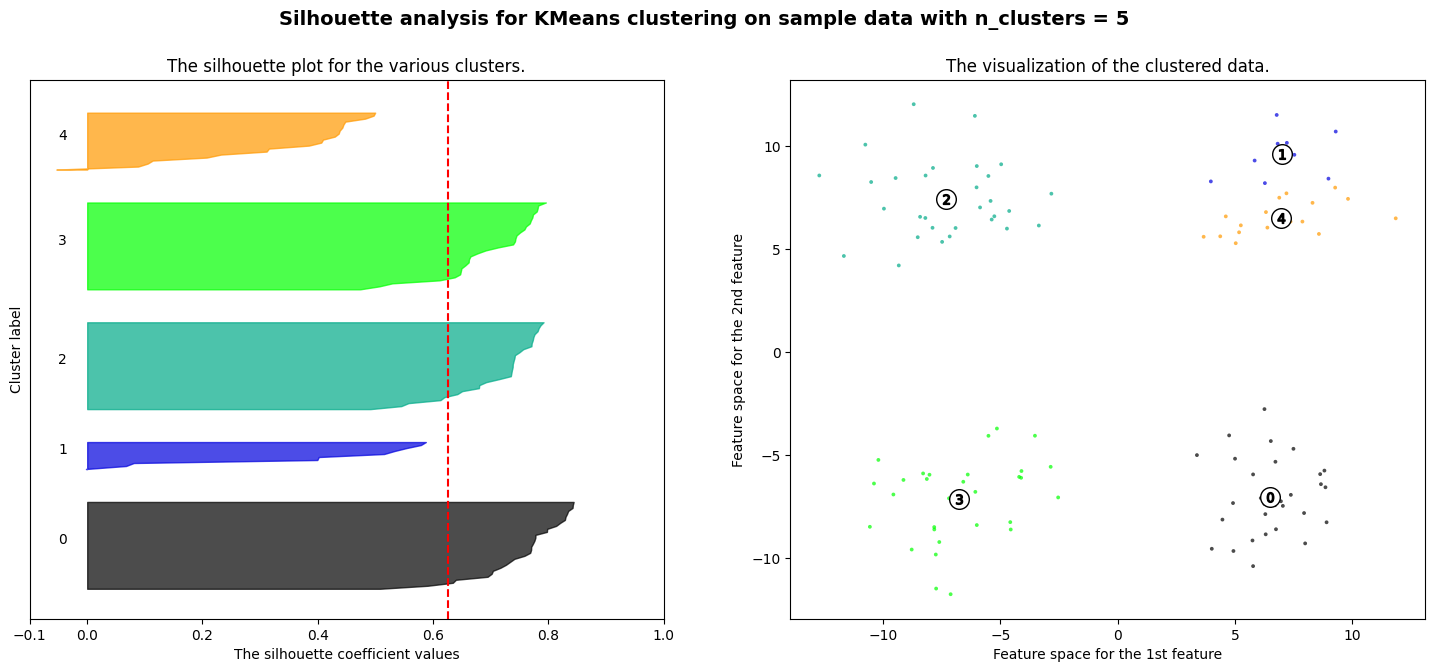

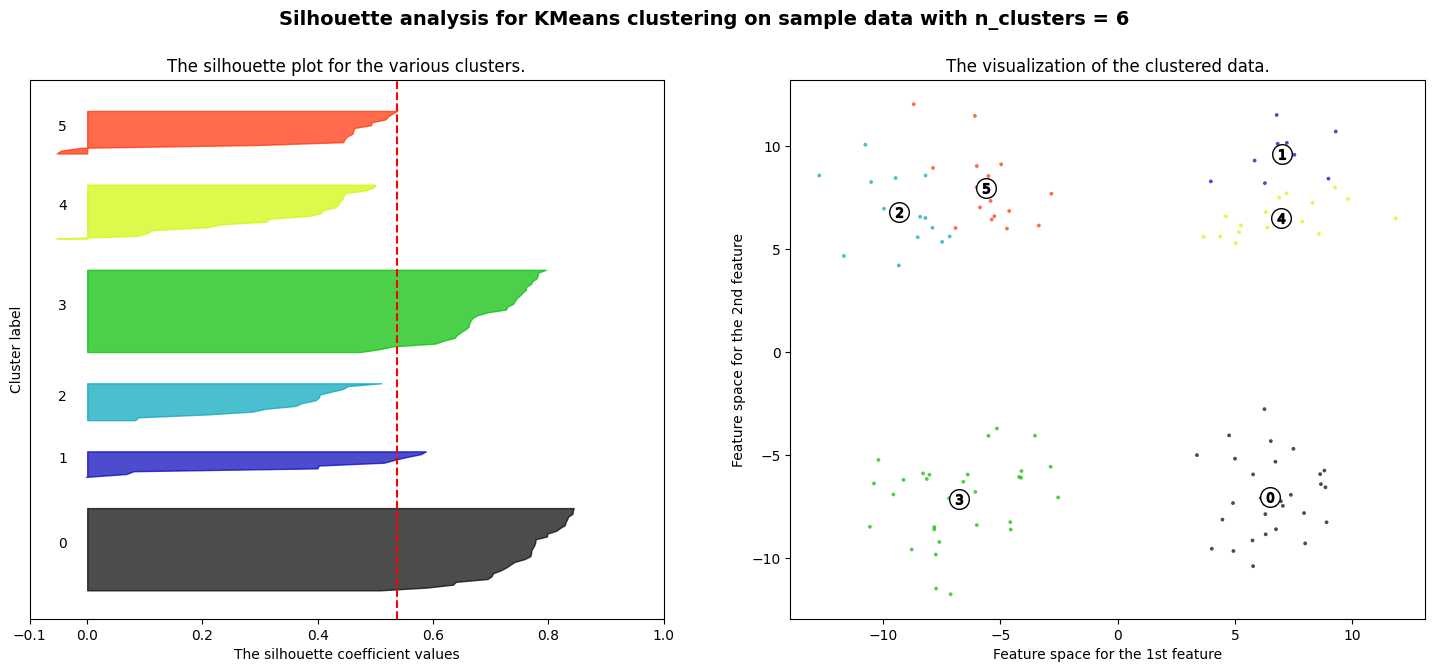

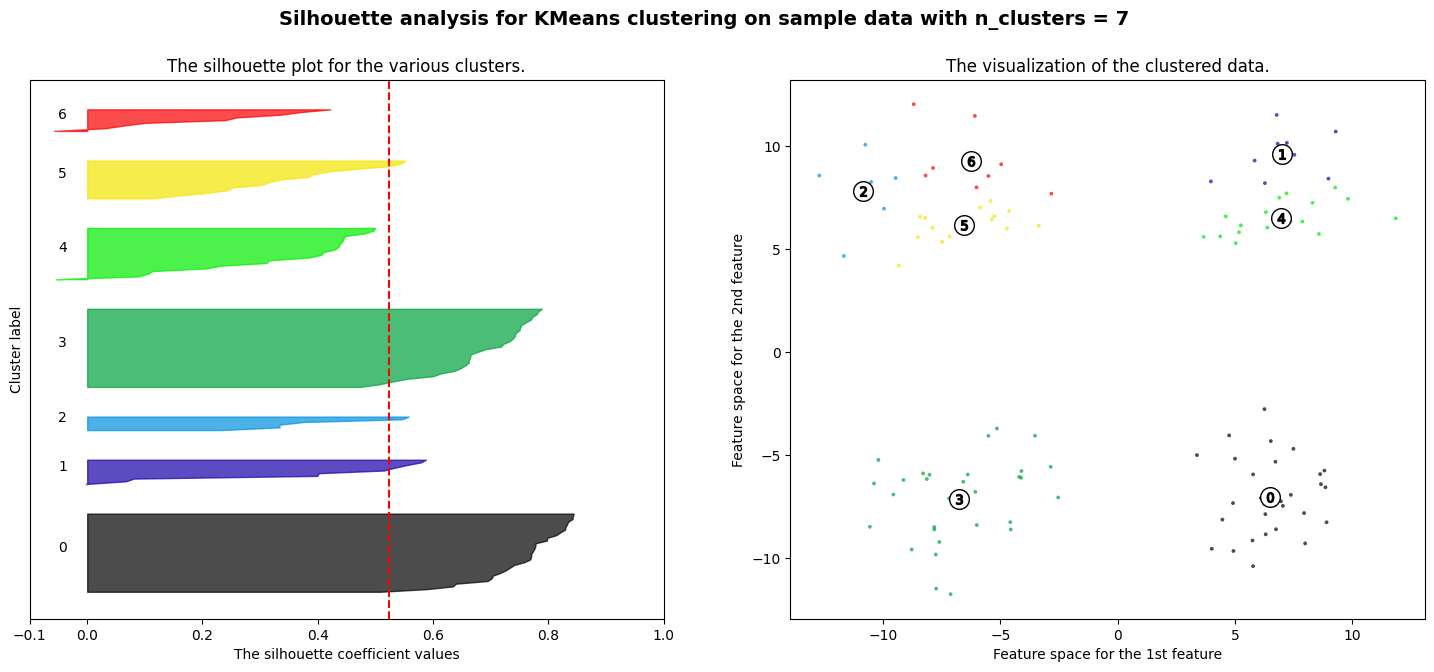

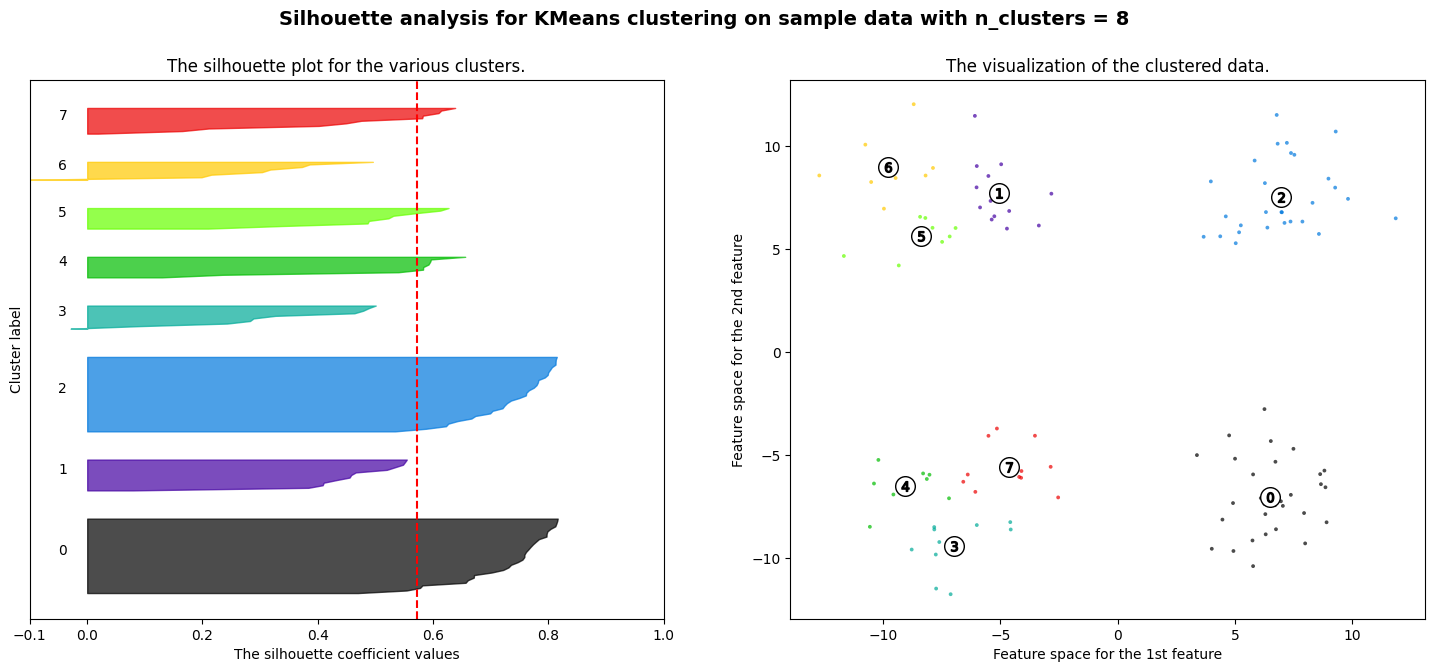

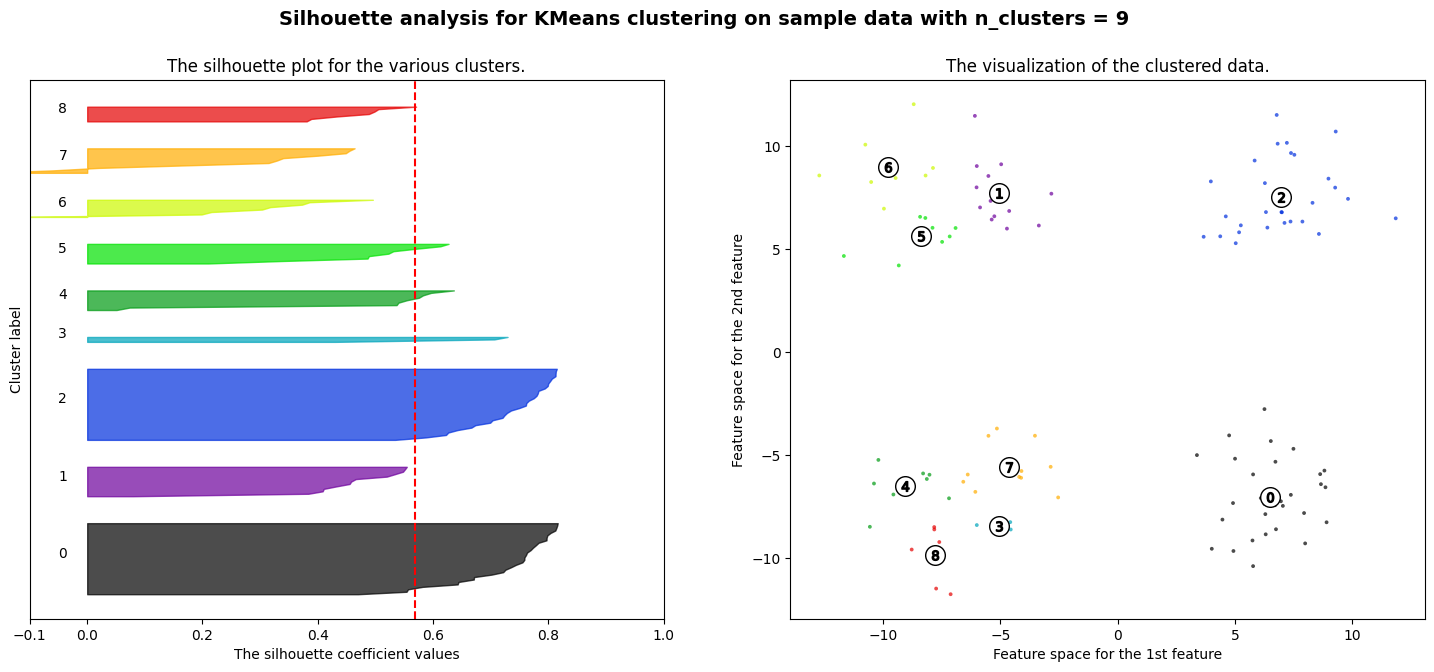

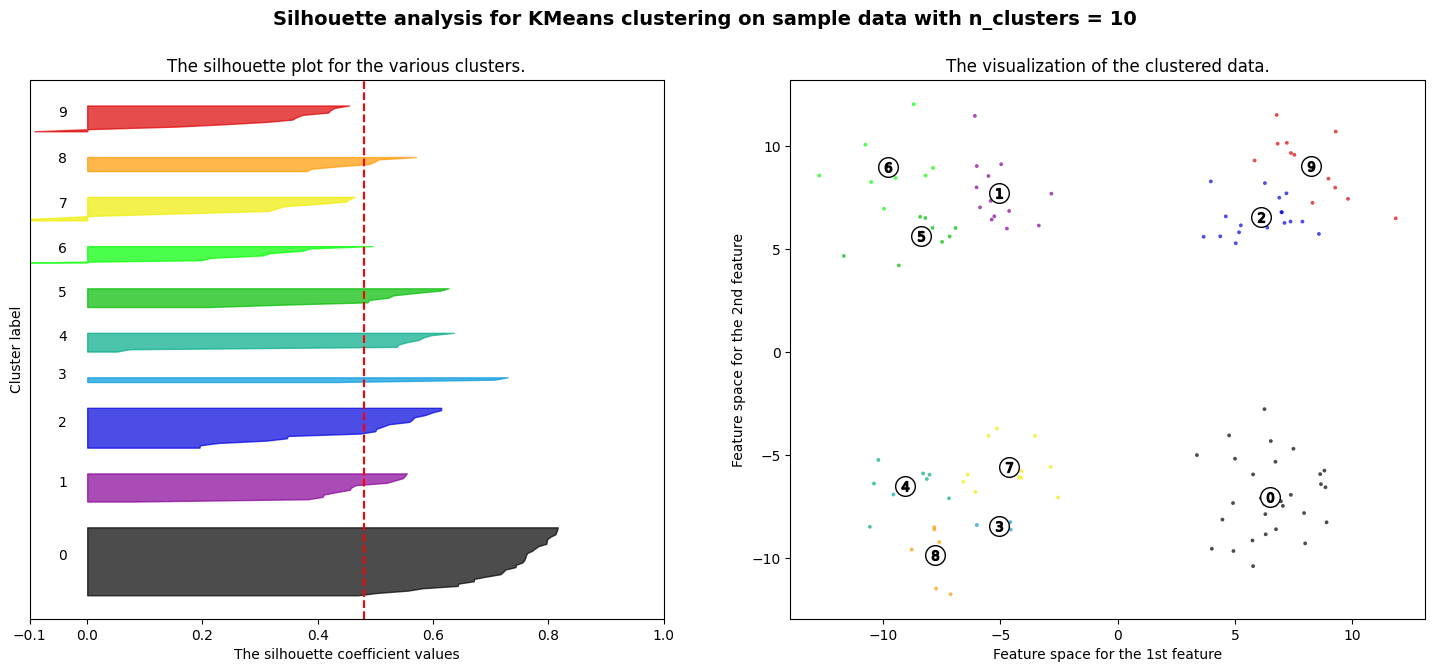

In [17]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [9]:
print('ok_')

ok_
